# Salary Predictor

## Life Cycle of a Machine Learning Project

1. **Understanding the Problem Statement**
2. **Data Collection**
3. **Data Checks to Perform**
4. **Exploratory Data Analysis**
5. **Data Pre-Processing**
6. **Model Training**
7. **Choosing the Best Model**

## 1. Problem Statement

Salaries in the field of data professions vary widely based on factors such as experience, job role, and performance. Accurately predicting salaries for data professionals is essential for both job seekers and employers.

## 2. Data Collection

- **Dataset Source:** [Download Dataset](https://drive.google.com/file/d/1qu4vWboJBgceI07k78I8Zr-eZgrsfUf3/view?usp=drive_link)
- **Dataset Information:** 13 columns and 2639 rows.

### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn, and Warnings Library.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Import the CSV Data as Pandas DataFrame**

In [2]:
df = pd.read_csv('data/Salary Prediction of Data Professions.csv')

**Show Top 5 Records**

In [3]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


**Shape of the dataset**

In [4]:
df.shape

(2639, 13)

### 2.2 Dataset Information

- **FIRST NAME**: First name  
- **LAST NAME**: Last name  
- **SEX**: Gender  
- **DOJ**: Date of joining the company 
- **CURRENT DATE**: Current date of data 
- **DESIGNATION**: Job role/designation  
- **AGE**: Age  
- **SALARY**: Target variable, the salary of the data professional 
- **UNIT**: Business unit or department  
- **LEAVES USED**: Number of leaves used  
- **LEAVES REMAINING**: Number of leaves remaining  
- **RATINGS**: Ratings or performance ratings  
- **PAST EXP**: Past work experience

## 3. Data Checks to Perform

- **Check Missing Values**
- **Check Duplicates**
- **Check Data Types**
- **Check the Number of Unique Values of Each Column**
- **Check Statistics of Dataset**
- **Check Various Categories Present in the Different Categorical Columns**

### 3.1 Check Missing values

In [5]:
df.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

**Handle missing values**

In [6]:
# For categorical columns
df['LAST NAME'].fillna(df['LAST NAME'].mode()[0], inplace=True)
df['DOJ'].fillna(df['DOJ'].mode()[0], inplace=True)

# For numerical columns
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['LEAVES USED'].fillna(df['LEAVES USED'].mean(), inplace=True)
df['LEAVES REMAINING'].fillna(df['LEAVES REMAINING'].median(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].mean(), inplace=True)

**Verify missing values**

In [7]:
df.isna().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

### 3.2 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2639 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2639 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2639 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2639 non-null   float64
 10  LEAVES REMAINING  2639 non-null   float64
 11  RATINGS           2639 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


### 3.3 Checking the number of unique values of each column

In [9]:
df.nunique()

FIRST NAME          2367
LAST NAME           2475
SEX                    2
DOJ                  967
CURRENT DATE           1
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           17
LEAVES REMAINING      16
RATINGS                5
PAST EXP              21
dtype: int64

### 3.4 Check statistics of data set

In [10]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000,2639.000000
mean,24.755589,58136.678287,22.501517,7.503600,3.486159,1.566881
std,3.906088,36876.956944,4.601850,4.601468,1.114510,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.501517,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


### Insight

1. **Age:** Average age is approximately 24.76 years, ranging from 21 to 45.
2. **Salary:** Mean salary is around ₹58,136.68, with considerable variability (std: ₹36,876.96).
3. **Leave Data:** Leaves used and remaining have means of 22.50 and 7.50, respectively.
4. **Ratings:** Ratings vary between 2 and 5, with a mean of approximately 3.49.
5. **Past Experience:** Mean past experience is 1.57 years, with a wide standard deviation (2.73).

### 3.5 Exploring Data

In [11]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.000000,6.0,2.000000,0
1,ANNIE,AAKRE,F,10-19-2013,01-07-2016,Associate,24.0,89207,Web,22.501517,13.0,3.486159,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.000000,7.0,3.000000,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.000000,8.0,3.000000,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,24.0,43161,Operations,27.000000,3.0,3.486159,3


In [12]:
print("Categories in 'SEX' variable:     ",end=" " )
print(df['SEX'].unique())

print("Categories in 'DESIGNATION' variable:  ",end=" ")
print(df['DESIGNATION'].unique())

print("Categories in'UNIT' variable:",end=" " )
print(df['UNIT'].unique())

Categories in 'SEX' variable:      ['F' 'M']
Categories in 'DESIGNATION' variable:   ['Analyst' 'Associate' 'Senior Analyst' 'Senior Manager' 'Manager'
 'Director']
Categories in'UNIT' variable: ['Finance' 'Web' 'IT' 'Operations' 'Marketing' 'Management']


In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']

We have 7 categorical features : ['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION', 'UNIT']


## 4. Exploring Data ( Visualization )

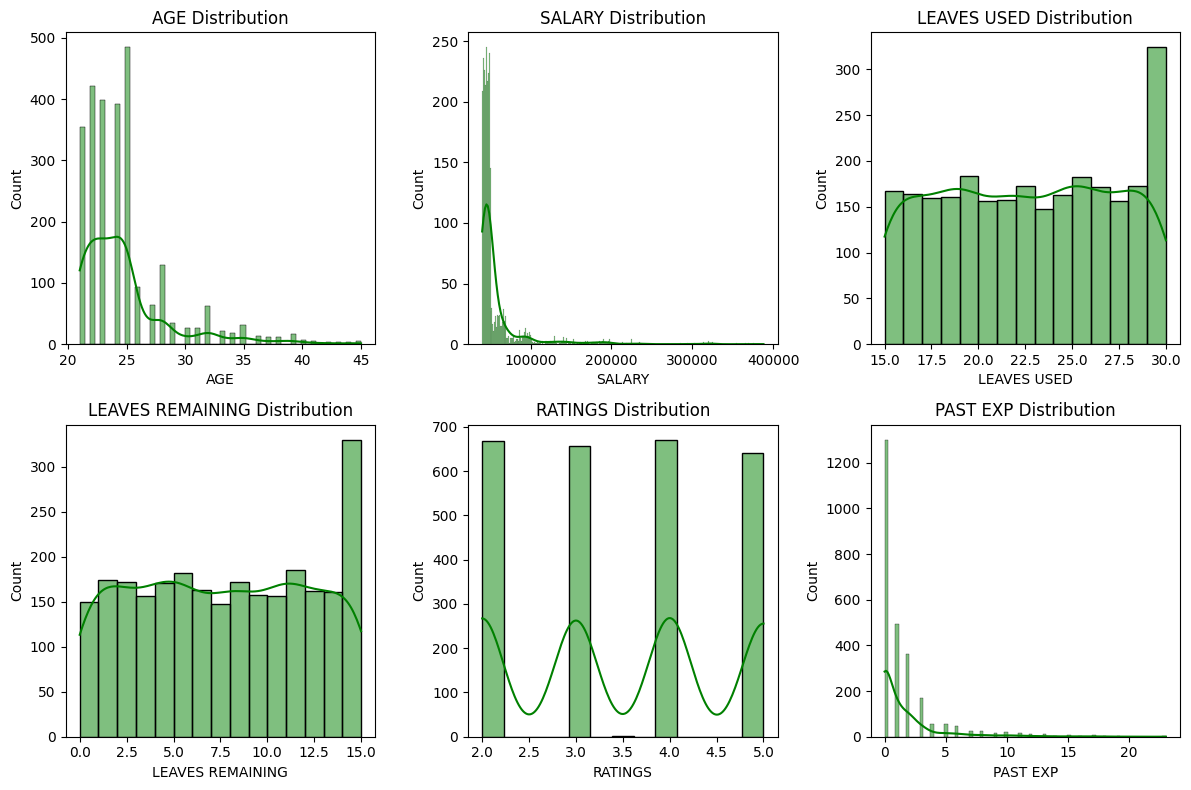

In [14]:
numerical_features = ['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='g')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

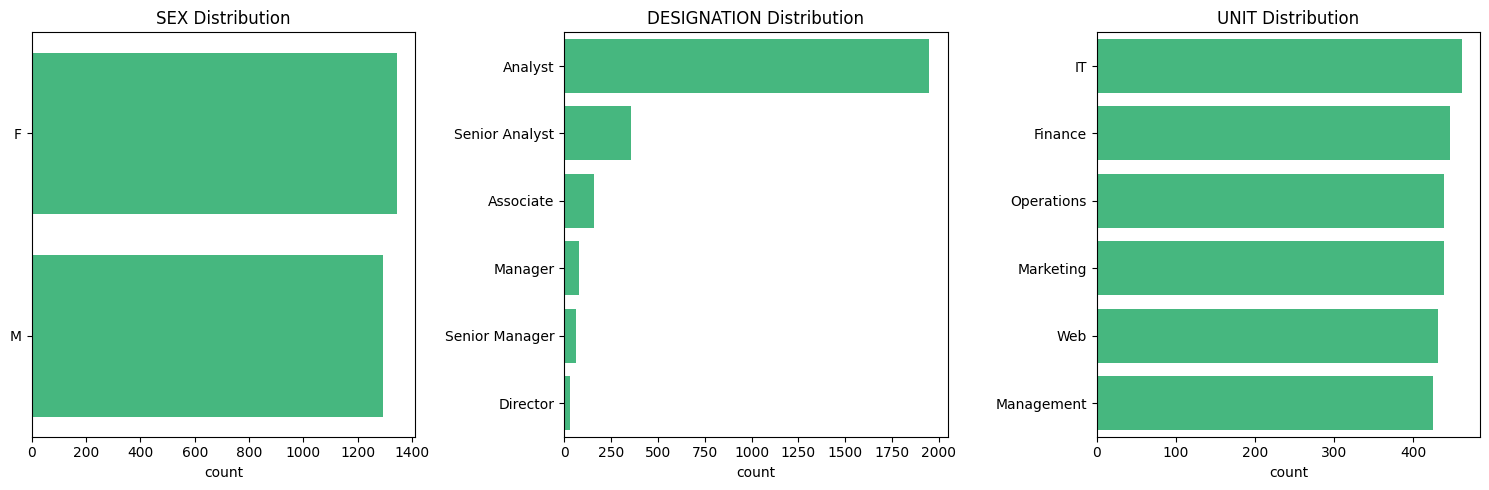

In [15]:
categorical_features = ['SEX', 'DESIGNATION', 'UNIT']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=feature, data=df, order=df[feature].value_counts().index, color='#33CA7F')
    plt.title(f'{feature} Distribution')
    plt.ylabel('')
plt.tight_layout()
plt.show()

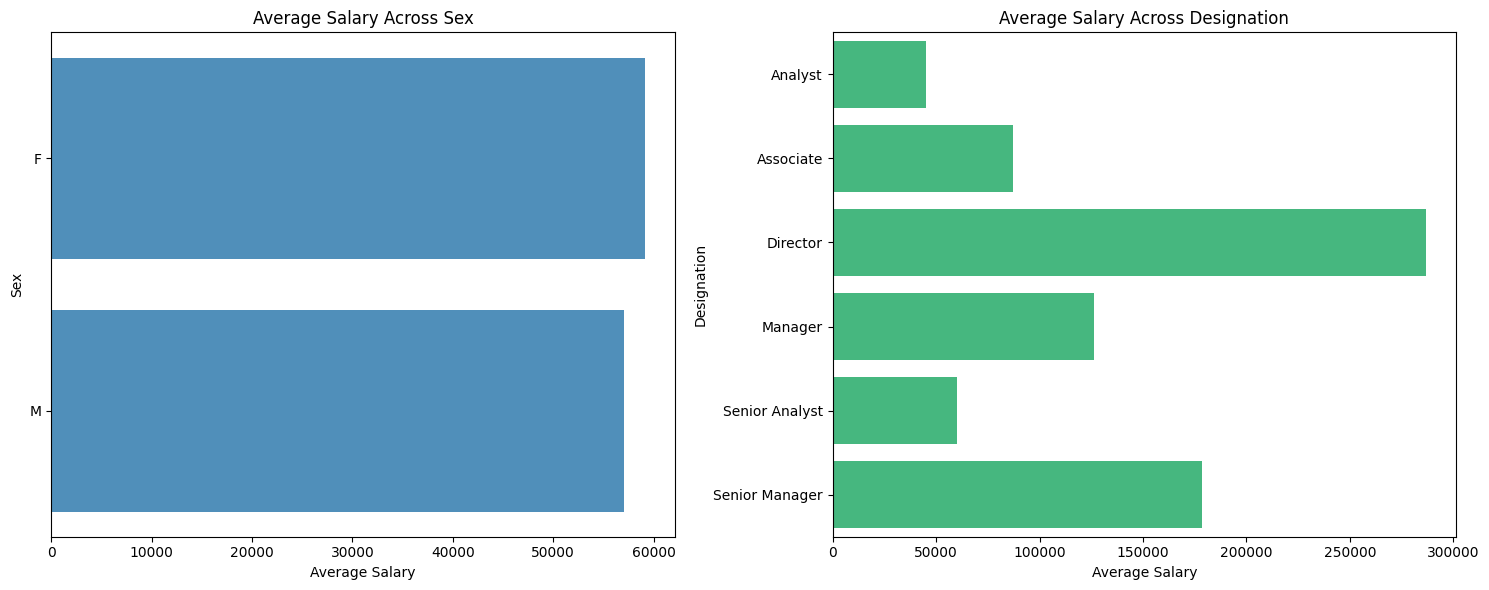

In [16]:
average_salary_sex = df.groupby('SEX')['SALARY'].mean().reset_index()
average_salary_designation = df.groupby('DESIGNATION')['SALARY'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='SALARY', y='SEX', data=average_salary_sex, color='#3E92CC', ax=axes[0])
axes[0].set_title('Average Salary Across Sex')
axes[0].set_xlabel('Average Salary')
axes[0].set_ylabel('Sex')

sns.barplot(x='SALARY', y='DESIGNATION', data=average_salary_designation, color='#33CA7F', ax=axes[1])
axes[1].set_title('Average Salary Across Designation')
axes[1].set_xlabel('Average Salary')
axes[1].set_ylabel('Designation')

plt.tight_layout()
plt.show()

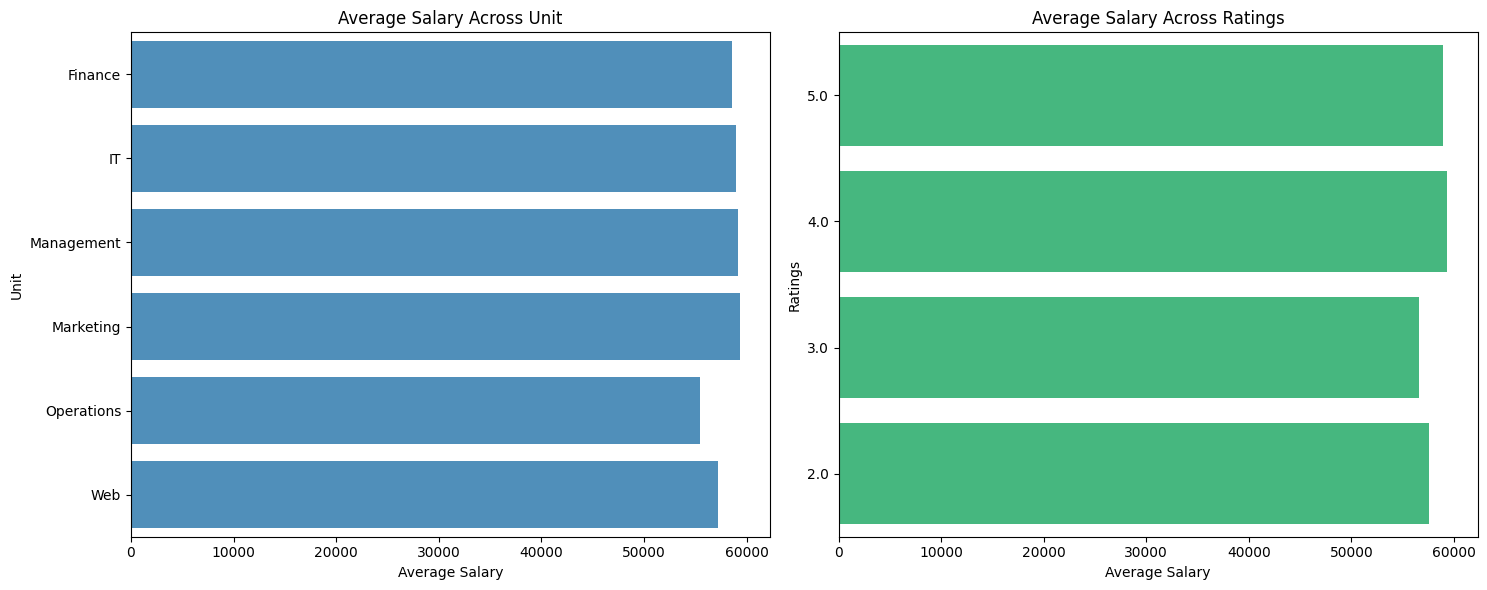

In [17]:
average_salary_unit = df.groupby('UNIT')['SALARY'].mean().reset_index()
average_salary_ratings = df.groupby('RATINGS')['SALARY'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='SALARY', y='UNIT', data=average_salary_unit, color='#3E92CC', ax=axes[0])
axes[0].set_title('Average Salary Across Unit')
axes[0].set_xlabel('Average Salary')
axes[0].set_ylabel('Unit')

rating_order = ['5.0', '4.0', '3.0', '2.0']
sns.barplot(x='SALARY', y='RATINGS', data=average_salary_ratings, color='#33CA7F', ax=axes[1], order=rating_order, orient='h')
axes[1].set_title('Average Salary Across Ratings')
axes[1].set_xlabel('Average Salary')
axes[1].set_ylabel('Ratings')

plt.tight_layout()
plt.show()

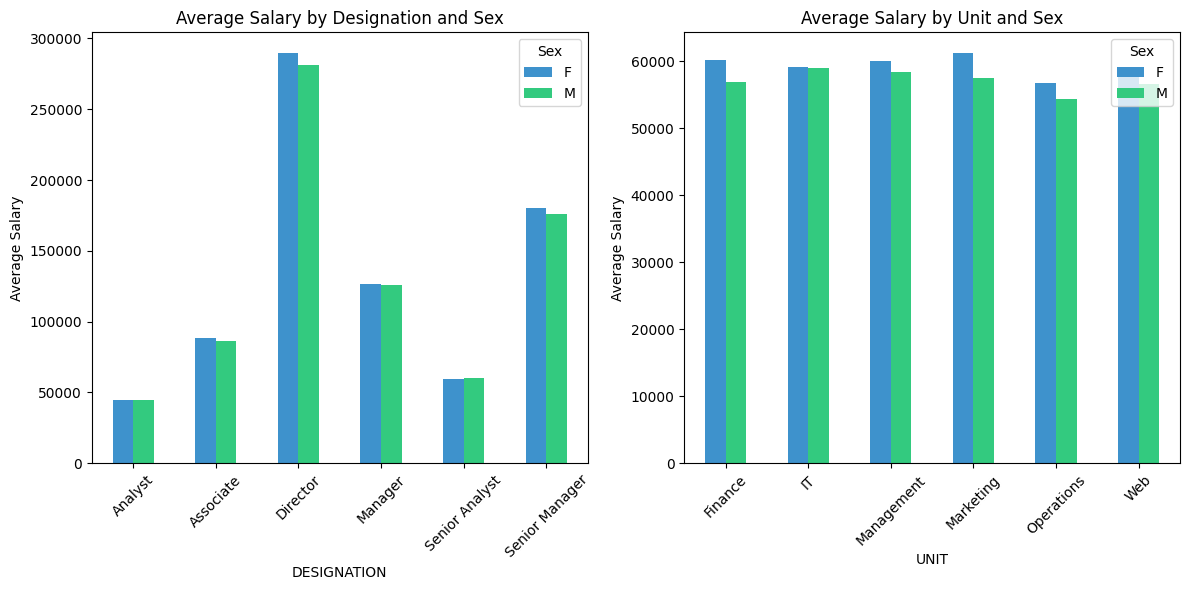

In [18]:
designation_sex_avg = df.groupby(['DESIGNATION', 'SEX'])['SALARY'].mean().unstack()
unit_sex_avg = df.groupby(['UNIT', 'SEX'])['SALARY'].mean().unstack()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

designation_sex_avg.plot(kind='bar', ylabel='Average Salary', title='Average Salary by Designation and Sex', ax=axs[0], color=['#3E92CC', '#33CA7F'])
axs[0].legend(title='Sex')
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45)

unit_sex_avg.plot(kind='bar', ylabel='Average Salary', title='Average Salary by Unit and Sex', ax=axs[1], color=['#3E92CC', '#33CA7F'])
axs[1].legend(title='Sex')
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

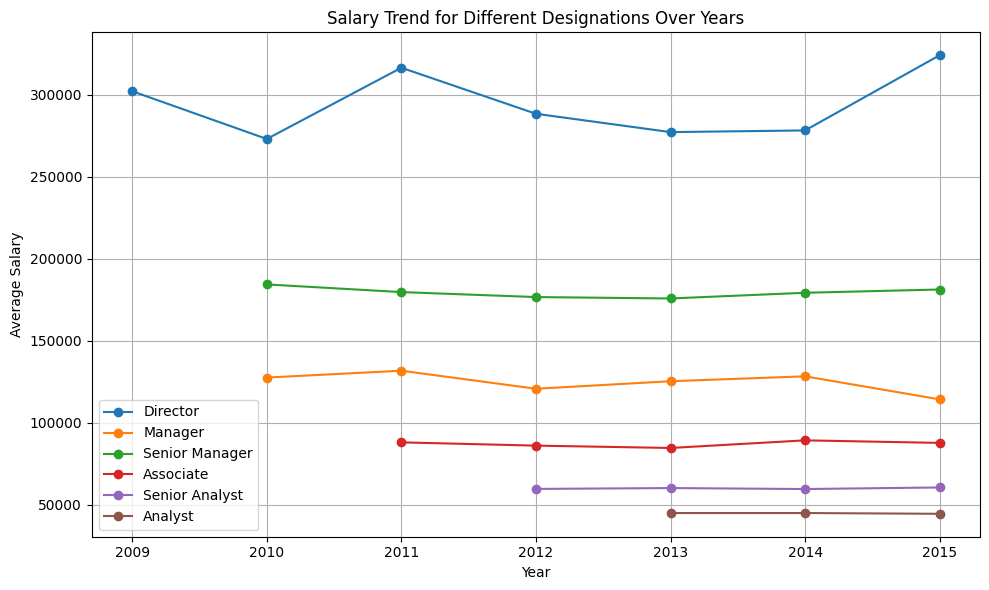

In [19]:
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['Year'] = df['DOJ'].dt.year

average_salary_per_designation = df.groupby(['Year', 'DESIGNATION'])['SALARY'].mean().reset_index()

plt.figure(figsize=(10, 6))

for designation in average_salary_per_designation['DESIGNATION'].unique():
    data = average_salary_per_designation[average_salary_per_designation['DESIGNATION'] == designation]
    plt.plot(data['Year'], data['SALARY'], marker='o', label=designation)

plt.title('Salary Trend for Different Designations Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

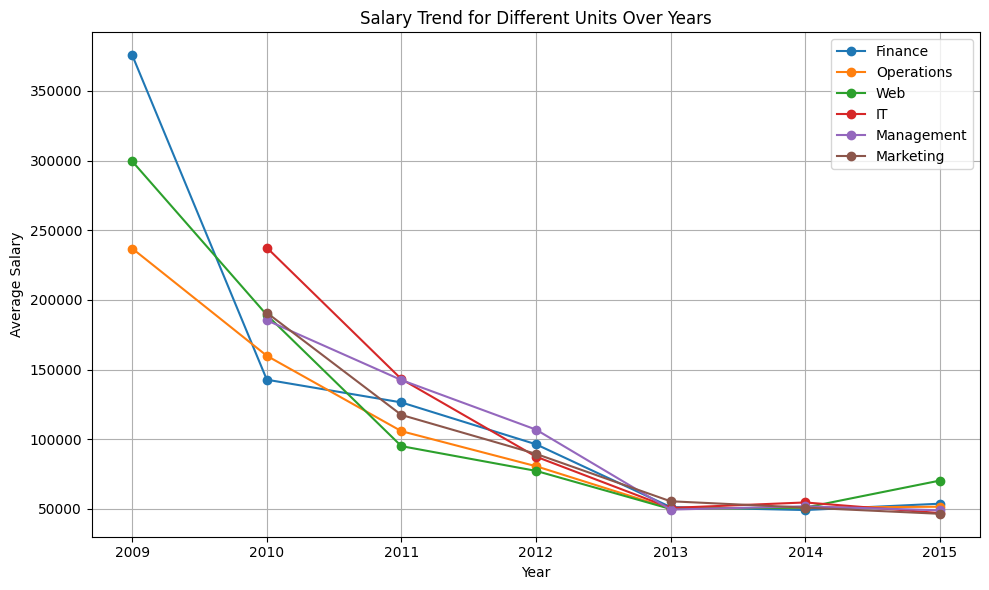

In [20]:
average_salary_per_unit = df.groupby(['Year', 'UNIT'])['SALARY'].mean().reset_index()

plt.figure(figsize=(10, 6))

for unit in average_salary_per_unit['UNIT'].unique():
    data = average_salary_per_unit[average_salary_per_unit['UNIT'] == unit]
    plt.plot(data['Year'], data['SALARY'], marker='o', label=unit)

plt.title('Salary Trend for Different Units Over Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

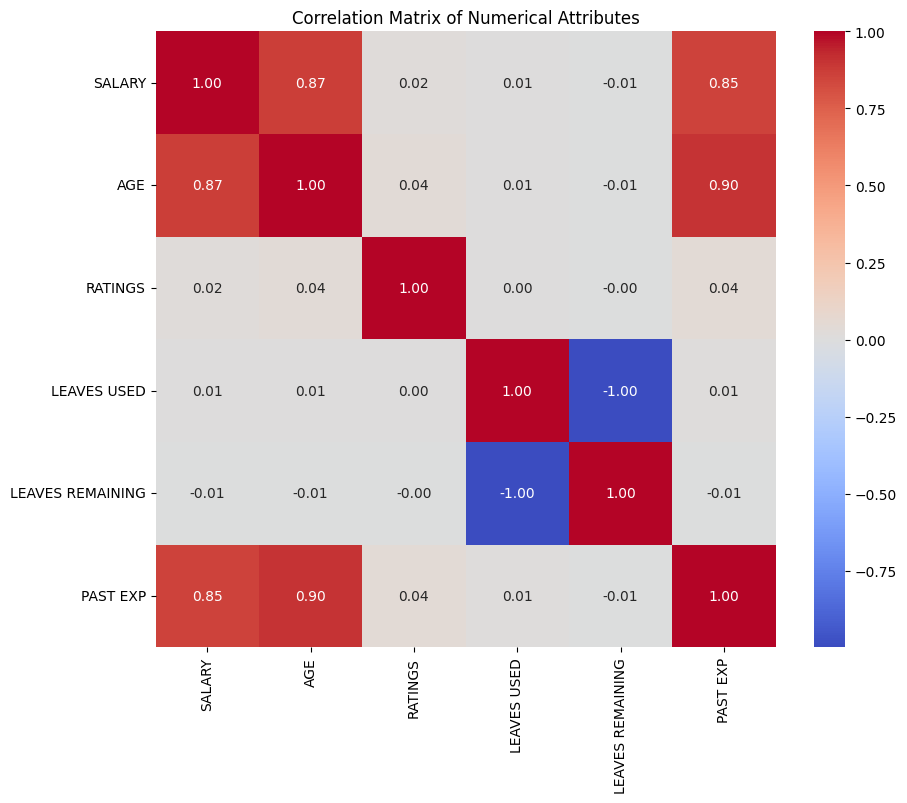

In [21]:
numerical_columns = ['SALARY', 'AGE', 'RATINGS', 'LEAVES USED', 'LEAVES REMAINING', 'PAST EXP']

correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

- **Values close to 1 indicate a strong positive correlation.**
- **Values close to -1 indicate a strong negative correlation.**
- **Values close to 0 indicate a weak or no linear correlation.**

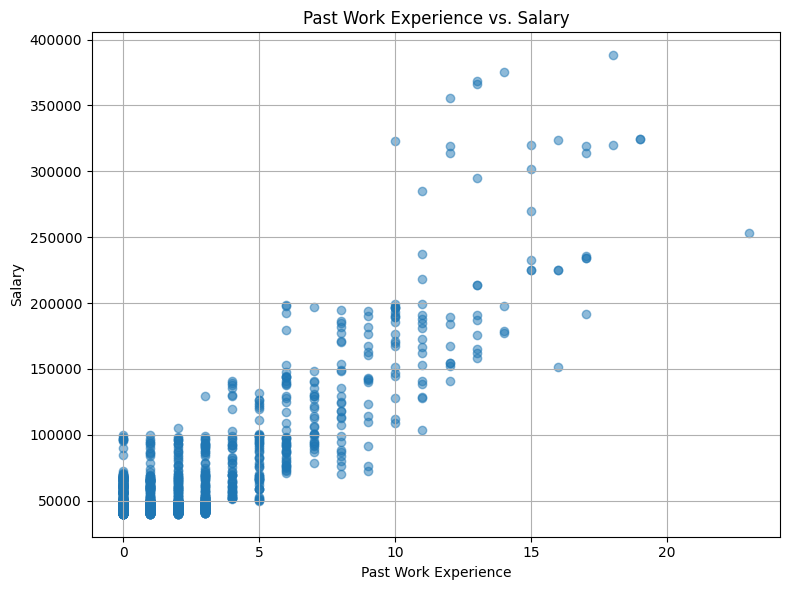

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(df['PAST EXP'], df['SALARY'], alpha=0.5)
plt.title('Past Work Experience vs. Salary')
plt.xlabel('Past Work Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

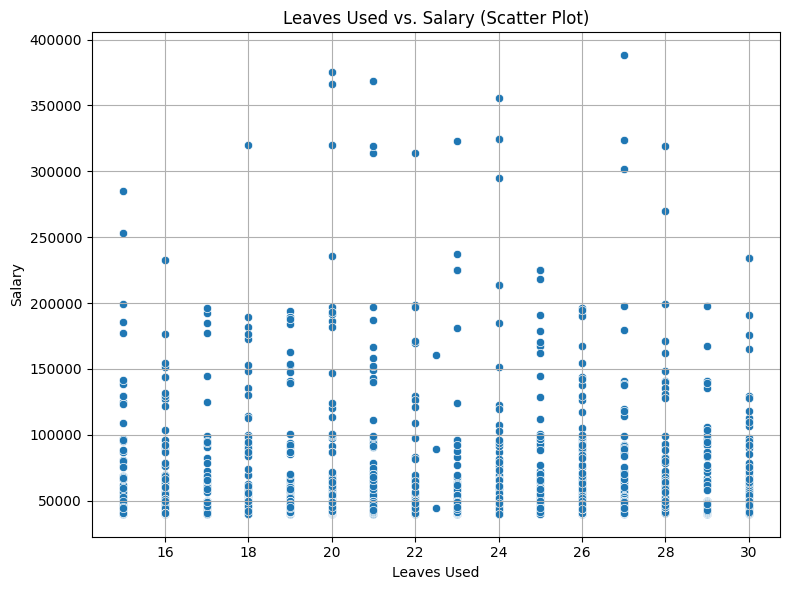

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LEAVES USED', y='SALARY', data=df)
plt.title('Leaves Used vs. Salary (Scatter Plot)')
plt.xlabel('Leaves Used')
plt.ylabel('Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

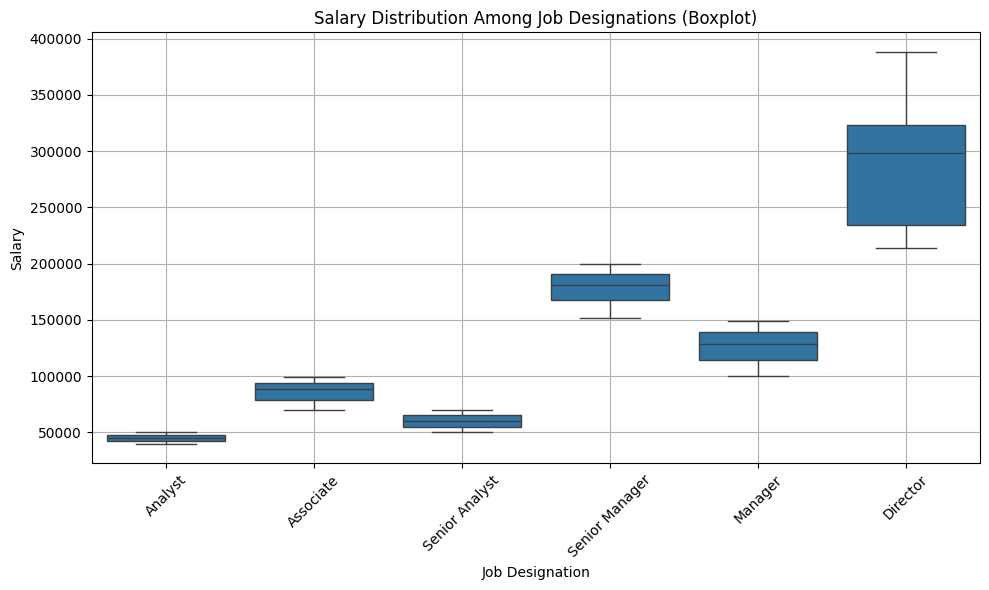

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DESIGNATION', y='SALARY', data=df)
plt.title('Salary Distribution Among Job Designations (Boxplot)')
plt.xlabel('Job Designation')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

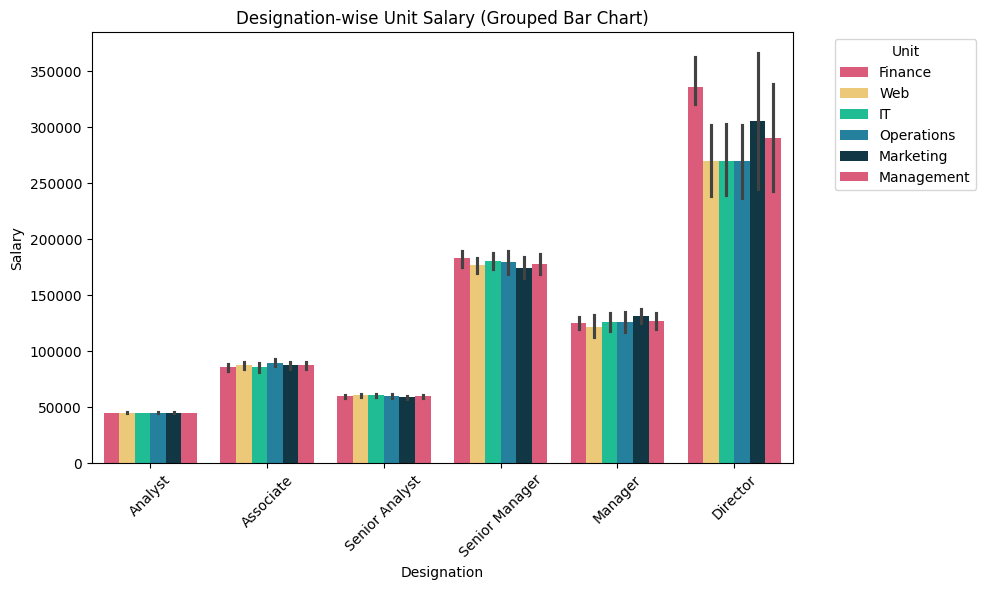

In [32]:
plt.figure(figsize=(10, 6))
custom_colors = ["#EF476F", "#FFD166", "#06D6A0", "#118AB2", "#073B4C"]  # Example custom colors in hex format
sns.barplot(x='DESIGNATION', y='SALARY', hue='UNIT', data=df, palette=custom_colors)
plt.title('Designation-wise Unit Salary (Grouped Bar Chart)')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.legend(title='Unit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

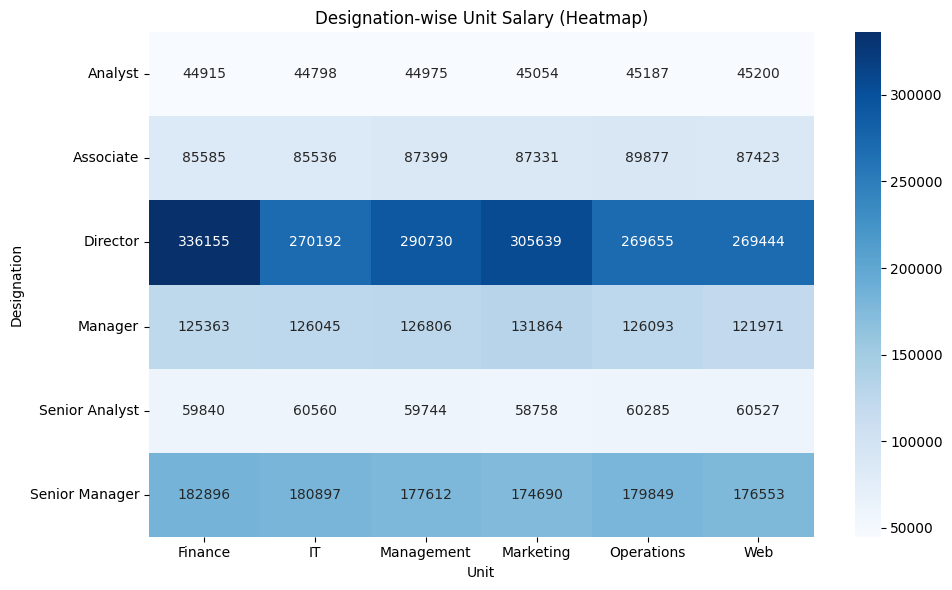

In [29]:
heatmap_data_designation = df.pivot_table(index='DESIGNATION', columns='UNIT', values='SALARY')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data_designation, cmap='Blues', annot=True, fmt='.0f')
plt.title('Designation-wise Unit Salary (Heatmap)')
plt.xlabel('Unit')
plt.ylabel('Designation')
plt.tight_layout()
plt.show()